#Predicting Medical Expenses using Linear regression 

The following topics are covered in this colab :

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables 
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Other models and techniques for regression using Scikit-learn
- Applying linear regression to other datasets

# Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 




> <img src="https://i.imgur.com/87Uw0aG.png" width="480">





#Step 1 - Download and Explore the Data

The dataset is available as a ZIP file at the following url:

In [64]:
dataset_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [65]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import opendatasets as od
od.download(dataset_url)

Using downloaded and verified file: ./medical-charges.csv


In [67]:
import os
data_dir='/content'
os.listdir(data_dir)

['.config', 'medical-charges.csv', 'sample_data']

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
path= data_dir +"/medical-charges.csv"

> **QUESTION 1**: Load the data from the file `train.csv` into a Pandas data frame.

In [70]:
medical=pd.read_csv(path)

In [71]:
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer. 

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.

In [72]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" ([body mass index](https://en.wikipedia.org/wiki/Body_mass_index)) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

> **QUESTION 2**: How many rows and columns does the dataset contain? 

In [73]:
n_rows = medical.shape[0]

In [74]:
n_cols = medical.shape[1]

In [75]:
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 1338 rows and 7 columns.


## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.


* libraries that we are going to use in this collab 

In [76]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#The following settings will improve the default style and font sizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

> **QUESTION 3**: How many `missing values` does the dataset contain? 

In [77]:
#check null value
medical.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [78]:
medical.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [79]:
fig = px.histogram(medical, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (between 18 & 64) in the USA.



### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [80]:
fig=px.histogram(medical,x='bmi',marginal='box', color_discrete_sequence=['red'],title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)


### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [81]:
fig=px.histogram(medical,x="charges",marginal='box',color='smoker', color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.

### Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [82]:
medical.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [83]:
px.histogram(medical, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [84]:
fig = px.scatter(medical, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [85]:
fig=px.scatter(medical,x="bmi",y="charges",color="smoker",opacity=0.8,hover_data=['sex'],title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [86]:
medical.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000





Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

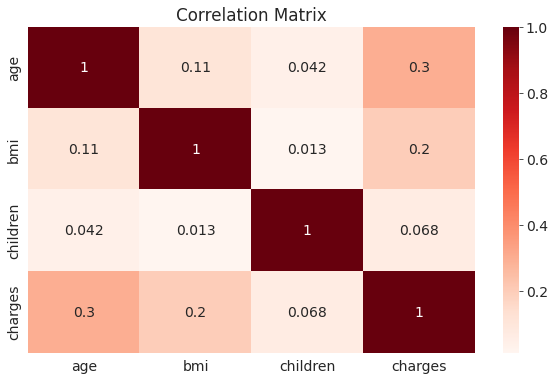

In [87]:
sns.heatmap(medical.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

# Step 2 - Prepare the Dataset for Training


Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


In [88]:
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Identify Inputs and Targets

While the dataset contains 1338 rows and  7 columns, not all of them are useful for modeling. Note the following:


- The last column `charges` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except  the last column) can be used as inputs to the model.
 

> **QUESTION 4**: Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

In [89]:
# Identify the input columns (a list of column names)
input_cols = list(medical.columns)[:-1]

In [90]:
print(input_cols)

['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [91]:
# Identify the name of the target column (a single string, not a list)
target_col =list(medical.columns)[-1]

In [92]:
print(target_col)

charges


Make sure that the `charges` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [93]:
inputs_df = medical[input_cols]
targets = medical[target_col]

In [94]:
inputs_df

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [95]:
targets

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

##Identify Numeric and Categorical Data
The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

> **QUESTION 5**: Crate two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.
>
> *Hint*: See this [StackOverflow question](https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas). 

In [96]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = inputs_df.select_dtypes(include=[object]).columns.tolist()

##Scale Numerical Values
The numeric columns in our dataset have varying ranges.

In [97]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,age,bmi,children
min,18.0,15.96,0.0
max,64.0,53.13,5.0


A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


> **QUESTION 7**: Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.

In [98]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])

# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



After scaling, the ranges of all numeric columns should be (0, 1).

In [99]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,age,bmi,children
min,-1.509965,-2.412011,-0.908614
max,1.765289,3.685522,3.240619


##Encode Categorical Columns
Our dataset contains several categorical columns, each with a different number of categories.

In [100]:
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

region    4
sex       2
smoker    2
dtype: int64



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

> **QUESTION 8**: Encode categorical columns in the dataset as one-hot vectors using `OneHotEncoder` from `sklearn.preprocessing`. Add a new binary (0/1) column for each category

In [101]:
from sklearn.preprocessing import OneHotEncoder

# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# 2. Fit the encoder to the categorical colums
encoder.fit(inputs_df[categorical_cols])

# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



8

In [102]:
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

The new one-hot category columns should now be added to `inputs_df`.

##Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [103]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_target, val_target = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)


In [104]:
train_inputs

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
693,-1.082758,-1.149689,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1297,-0.797954,-0.681342,0.751079,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
634,0.839674,1.482405,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1022,0.554869,0.888564,-0.078767,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
178,0.483668,-0.289276,0.751079,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.509965,0.112633,2.410772,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1130,-0.014740,-1.114419,3.240619,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1294,1.338082,-0.900341,-0.908614,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
860,-0.157143,2.778356,0.751079,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [105]:
train_target

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1003, dtype: float64

In [106]:
val_inputs

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,0.412467,-0.900341,0.751079,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
887,-0.228344,-0.105546,-0.908614,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
890,1.765289,-0.619825,-0.908614,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1293,0.483668,-0.806836,1.580926,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
259,-1.438764,0.206139,-0.908614,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
342,1.480485,-0.510736,-0.908614,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
308,1.338082,0.689250,-0.908614,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1128,-0.370746,0.350498,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
503,-1.438764,-0.067815,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [107]:
val_target

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

# Step 3 - Train a Linear Regression Model

We're now ready to train the model. Linear regression is a commonly used technique for solving [regression problems](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C6). In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">

However, linear regression doesn't generalize very well when we have a large number of input columns with co-linearity i.e. when the values one column are highly correlated with values in other column(s). This is because it tries to fit the training data perfectly. 

Instead, we'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better. Learn more about ridge regression here: https://www.youtube.com/watch?v=Q81RR3yKn30

> **QUESTION 9**: Create and train a linear regression model using the `Ridge` class from `sklearn.linear_model`.

In [108]:
from sklearn.linear_model import Ridge

# Create the model
model = Ridge(alpha=2)

# Fit the model using inputs and targets
model.fit(train_inputs,train_target)

Ridge(alpha=2)

`model.fit` uses the following strategy for training the model (source):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

# Step 4 - Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

> **QUESTION 10**: Generate predictions and compute the RMSE loss for the training and validation sets. 
> 
> *Hint*: Use the `mean_squared_error` with the argument `squared=False` to compute RMSE loss.

In [109]:
train_preds =model.predict(train_inputs)

In [110]:
train_preds

array([ 1862.75656201,  4256.80755823, 14223.54426728, ...,
       11540.11318311, 37136.55938989, 11509.58782133])

In [121]:
train_target

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1003, dtype: float64

In [123]:
from sklearn.metrics import mean_squared_error,r2_score
# Root mean square error
train_rmse=np.sqrt(mean_squared_error(train_target,train_preds))
print('The RMSE loss for the training set is {}.'.format(train_rmse))
# r2_score
train_r2=r2_score(train_target,train_preds)
print('The r2_score for the training set is {}.'.format(train_r2))

The RMSE loss for the training set is 6083.41990354153.
The r2_score for the training set is 0.7449314406785119.


In [112]:
val_preds = model.predict(val_inputs)

In [113]:
val_preds

array([ 8976.12915711,  7076.58001237, 36750.52302435,  9551.38866115,
       26854.97115837, 10905.6120508 ,   129.33964692, 17053.51358734,
        1045.20009935, 11326.79907323, 27937.55603232,  9471.6078298 ,
        5132.57862244, 38253.33667742, 40112.09504331, 36928.80789233,
       15177.69541497, 35666.24673554,  9013.29939822, 31311.73818199,
        3842.86361465, 10171.94732687,  2355.4712893 ,  7124.50519503,
       11340.5673585 , 12996.59391106, 14515.51391165,  6156.78970325,
        9977.22535085,  2094.70341997,  9079.0643113 , 13127.31265566,
        4423.30625277,  3390.90327688,  4460.21665721, 13133.24434133,
        1892.78778075,  8777.16476157, 33136.04916885, 32384.5224011 ,
        3830.38778029,  4381.03594005, 14144.30415903, 11539.34576686,
        8736.36141929, 12159.30542087,  5270.48687457,  3071.64294422,
       35313.3607827 ,  9113.41913733, 15785.6877687 ,  2261.07968364,
       12404.90129765,  1502.60079715, 13390.74958071, 12674.22059096,
      

In [114]:
val_rmse =mean_squared_error(val_target,val_preds,squared=False)
print('The RMSE loss for the validation set is {}.'.format(val_rmse))
train_r2=r2_score(val_target,val_preds)
print('The r2_score for the validation set is {}.'.format(train_r2))

The RMSE loss for the validation set is 5929.501120588188.
The r2_score for the validation set is 0.7669910664874315.


## Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

> **QUESTION 11**: Identify the weights (or coefficients) assigned to for different features by the model.
> 
> *Hint:* Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [115]:
weights = model.coef_.flatten()

Let's create a dataframe to view the weight assigned to each column.

In [116]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [117]:
weights_df

,columns,weight
6,smoker_yes,11742.543298
0,age,3637.435745
1,bmi,2066.691012
2,children,515.069715
7,region_northeast,495.237413
8,region_northwest,138.856905
4,sex_male,25.987398
3,sex_female,-25.987398
9,region_southeast,-273.862414
10,region_southwest,-360.231904


##Making Predictions
The model can be used to make predictions on new inputs using the following helper function:

In [118]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    return model.predict(X_input)[0]